##### <font color='blue'> Problem Statement </font> 

To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.

##### <font color='blue'> Problem Description </font> 

Our client is a major non-life insurance company that wants to evaluate customer life time value based on each customer's 
demographics and policy information including claim details. The CLV is a profitablity metric the organization has set in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value.

It is important for the company to take an optimal decision and implement appropriate action plans. They will be able to do this
by accurately predicting the CLV of its customers.

An analytical and modelling framework to predict the life time value of each customer is designed.Various statistical and machine learning models were applied to predict the CLV. This is based on the quantitative and qualitative features provided in the dataset.

##### Loading the required Libraries

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report

In [149]:
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

##### Loading Train and Test data

In [150]:
os.chdir(r"C:\Users\pdrva\Desktop\Divya\INSOFE\MitH")
data=pd.read_csv("train-1574429526318.csv",na_values=['?'])
test=pd.read_csv("test-1574429501088.csv",na_values=['?'])

##### Understanding data

In [151]:
# To get the top 5 records of train
data.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [152]:
# To get the top 5 records of test
test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,...,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,...,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize


In [153]:
# To get the dimensions of train data
data.shape

(9806, 22)

In [154]:
# To get the dimensions of test data
test.shape

(1767, 21)

In [155]:
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,"No of NAs":data.isna().sum(),"No of Levels":data.apply(lambda x: x.nunique(),axis=0),"Levels":data.apply(lambda x: str(x.unique()),axis=0)}))

In [156]:
# Understanding train data
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
CustomerID,int64,0,9806,[5917 2057 4119 ... 8767 9900 11323]
Customer.Lifetime.Value,float64,0,6477,[7824.372789 8005.964669 8646.504109 ... 20496...
Coverage,object,925,3,['Basic' 'Extended' nan 'Premium']
Education,object,129,5,['Bachelor' 'College' 'High School or Below' '...
EmploymentStatus,object,118,5,['Unemployed' 'Employed' 'Retired' 'Medical Le...
Gender,object,129,2,['F' 'M' nan]
Income,float64,118,4621,[0.0 63357.0 64125.0 ... 26173.0 74665.0 18017.0]
Location.Geo,object,0,2840,"['17.7,77.7' '28.8,76.6' '21.6,88.4' ... '22.3..."
Location.Code,object,119,3,['Urban' 'Suburban' 'Rural' nan]
Marital.Status,object,129,3,['Married' 'Divorced' 'Single' nan]


In [157]:
# Understanding test data
understand_data(test)

,Datatype,No of NAs,No of Levels,Levels
CustomerID,int64,0,1767,[17 19 29 ... 11559 11570 11572]
Coverage,object,0,3,['Basic' 'Extended' 'Premium']
Education,object,0,5,['Bachelor' 'College' 'Master' 'High School or...
EmploymentStatus,object,0,4,['Employed' 'Disabled' 'Medical Leave' 'Unempl...
Gender,object,0,2,['M' 'F']
Income,float64,239,1219,[43836.0 28812.0 77026.0 ... 30205.0 36918.0 5...
Location.Geo,object,0,1192,"['12.6,79.4' '17.3,78.4' '18.4,73.5' ... '18.8..."
Location.Code,object,0,3,['Rural' 'Urban' 'Suburban']
Marital.Status,object,0,3,['Single' 'Married' 'Divorced']
Monthly.Premium.Auto,float64,72,142,[73.0 93.0 110.0 64.0 79.0 71.0 72.0 111.0 237...


In [158]:
def total_NAs(data) :
    print ("Total NAs:",data.isna().sum().sum())

In [159]:
# Check total NAs in train data
total_NAs(data)

Total NAs: 4920


In [160]:
# Check total NAs in test data
total_NAs(test)

Total NAs: 353


In [161]:
# Check the summary statistics of train data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,9806,NaN,NaN,NaN,5778.38,3343.29,1,2879.25,5783,8678.75,11573
Customer.Lifetime.Value,9806,NaN,NaN,NaN,7998.05,6848.06,1898.01,4013.95,5780.18,8960.28,83325.4
Coverage,8881,3,Basic,5361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9677,5,Bachelor,2934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9688,5,Employed,6020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9677,2,F,4985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9688,NaN,NaN,NaN,37511.1,30293,0,0,33767.5,62018,99981
Location.Geo,9806,2840,"NA,NA",119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location.Code,9687,3,Suburban,6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital.Status,9677,3,Married,5643,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
# Check the summary statistics of test data
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,1767,NaN,NaN,NaN,5834.83,3328.7,17,2977,5813,8702.5,11572
Coverage,1767,3,Basic,1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1767,5,Bachelor,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,1767,4,Employed,1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1767,2,F,886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,1528,NaN,NaN,NaN,44606.4,29046.8,0,23491.8,42821,67968.5,99960
Location.Geo,1767,1192,"17.1,78.2",8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location.Code,1767,3,Suburban,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital.Status,1767,3,Married,1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly.Premium.Auto,1695,NaN,NaN,NaN,93.6224,34.7522,61,69,84,110,298


#### EDA

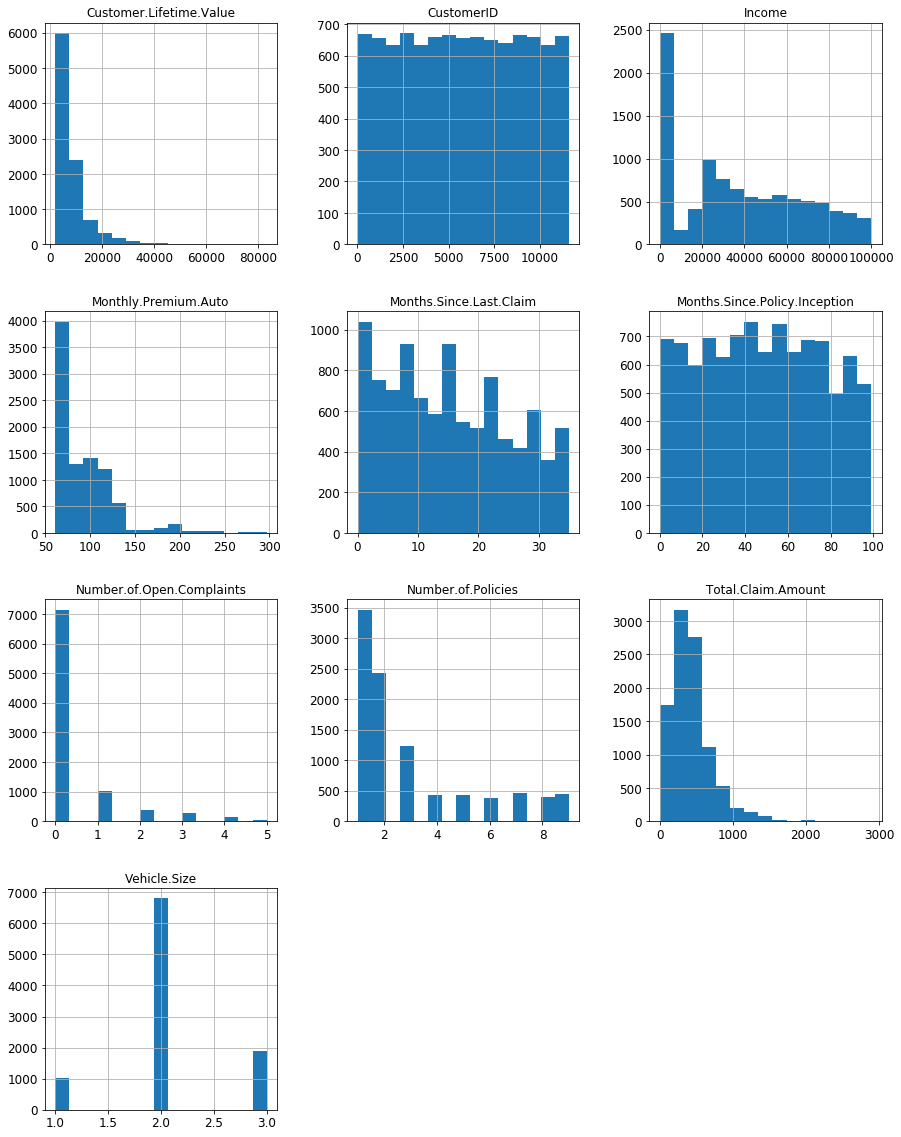

In [33]:
# Histogram to check the distribution of all the numerical columns
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax, bins = 15)
plt.show()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

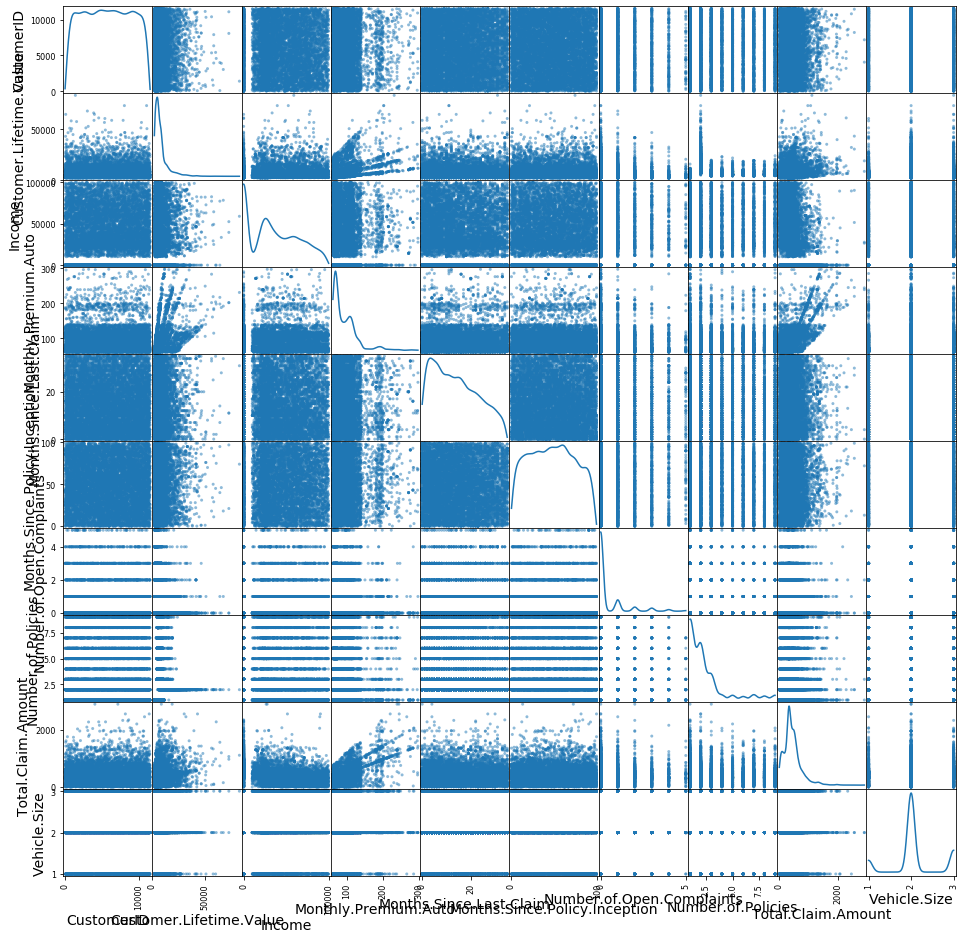

In [36]:
# Scatterplot to check the relation between each pair of numerical columns
pd.plotting.scatter_matrix(data, figsize=(16, 16), diagonal='kde')
plt.show()

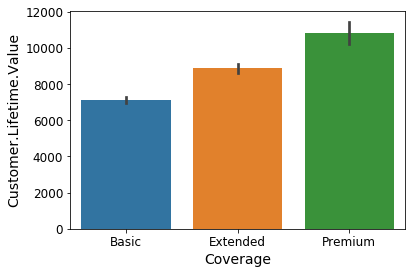

In [37]:
# Bar Chart to analyse the relationship between Coverage and Customer.Lifetime.Value
sns.barplot(y = "Customer.Lifetime.Value", x = "Coverage", data = data)
# CLV is less for customers with Basic coverage and more for customers with Premium coverage. Makes sense because customers 
# with Premium coverage contribute more to profitability.

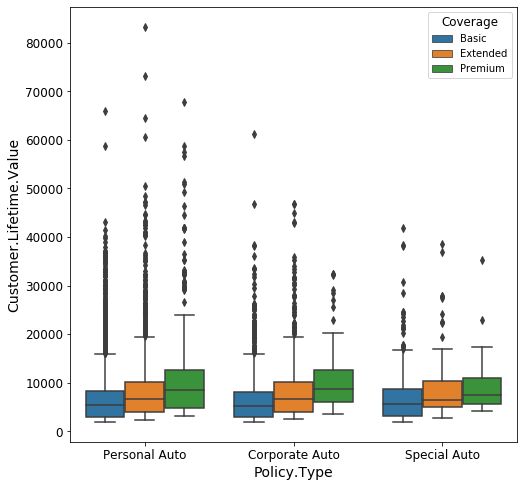

In [38]:
# Boxplot to check the distribution of Customer.Lifetime.Value w.r.t Policy.Type (for each coverage type)
plt.figure(figsize=(8,8))
sns.boxplot(x='Policy.Type',y='Customer.Lifetime.Value',hue='Coverage',data=data)
plt.show()
# Notice that CLV is more for Corporate customers with Premium coverage.

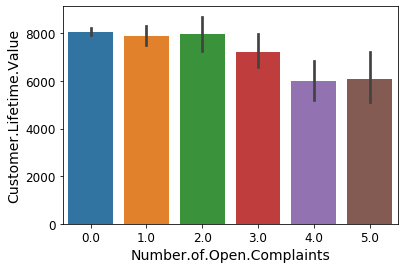

In [39]:
# Bar Chart to analyse the relationship between Number.of.Open.Complaints and Customer.Lifetime.Value
sns.barplot(y = "Customer.Lifetime.Value", x = "Number.of.Open.Complaints", data = data)
# Customers having more complains are having less Lifetime value than those with less complaints.
# Happy customers tend to remain and they high high CLV.

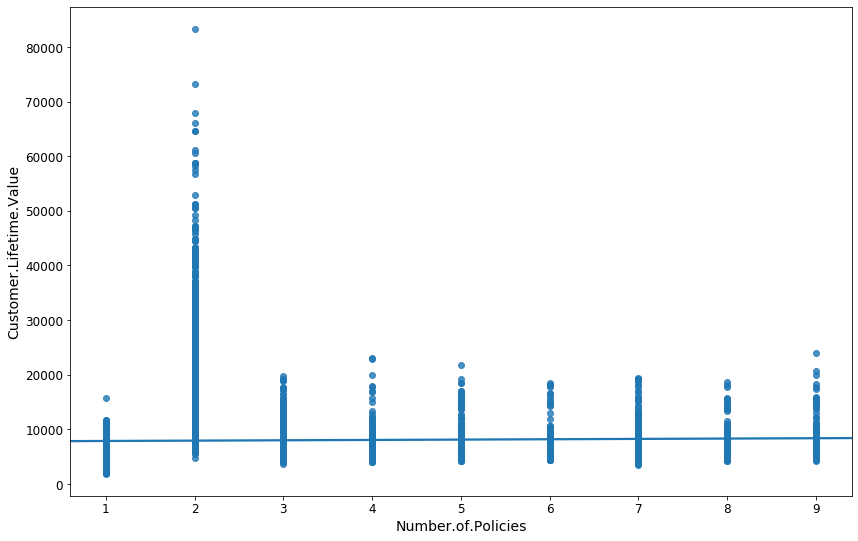

In [40]:
# Plot a scatterplot(regplot) using seaborn. A scatterplot is used to check the relation between 2 numerical variables.
# Plot to analyse the relationship between Number.of.Policies and Customer.Lifetime.Value.
plt.figure(figsize=(14,9))
sns.regplot(x='Number.of.Policies',y='Customer.Lifetime.Value',data=data)
plt.show()
# Either there is no much relevent pattern or looks like after a customer take more than one policy, they all have average CLV. 
# Customers who are at the point of conversion to loyal customers are regarded highly. # Also, rather than the number of policies,
# policy premium might be a significant factor to look at.

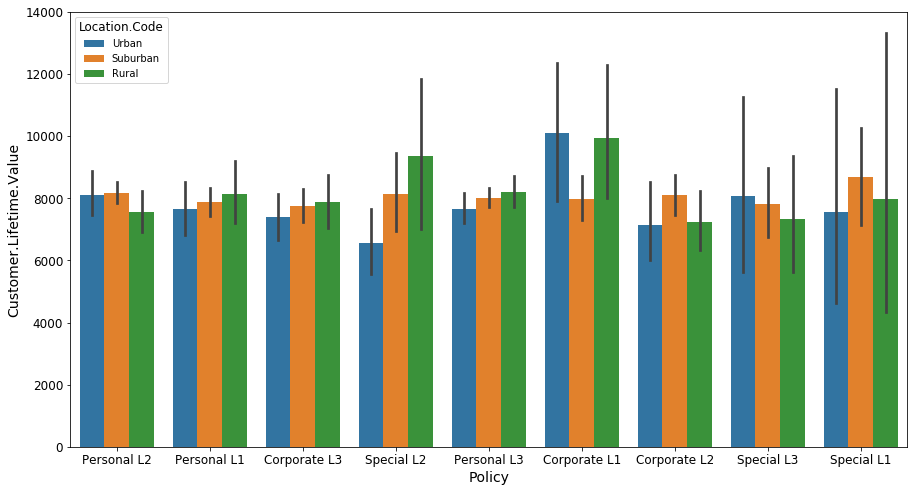

In [41]:
# Bar Chart to analyse the relationship between Policy and Customer.Lifetime.Value
plt.figure(figsize=(15,8))
sns.barplot(y = "Customer.Lifetime.Value", x = "Policy",hue='Location.Code', data = data)
# Corporate L1 customers in Urban areas have high CLV.

              Customer.Lifetime.Value
Policy                               
Corporate L1              8758.643836
Special L1                8356.949131
Special L2                8085.813639
Personal L2               8071.909909
Personal L3               7976.006677
Personal L1               7885.398058
Corporate L2              7802.138245
Special L3                7798.269031
Corporate L3              7733.517636


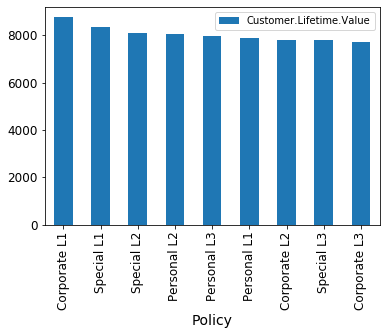

In [42]:
# Bar Chart to analyse the relationship between Policy and Customer.Lifetime.Value
x=pd.DataFrame(data.groupby('Policy')['Customer.Lifetime.Value'].mean())
x=x.sort_values(by='Customer.Lifetime.Value',ascending=False)
print(x)
x.plot(kind='bar')
# Corporate policies under location L1 contribute to more CLV because they have high average CLV.

              Customer.Lifetime.Value
Policy                               
Personal L3              2.900874e+07
Personal L2              1.833131e+07
Personal L1              1.004600e+07
Corporate L3             8.251663e+06
Corporate L2             4.821721e+06
Corporate L1             3.591044e+06
Special L2               1.528219e+06
Special L3               1.208732e+06
Special L1               5.348447e+05


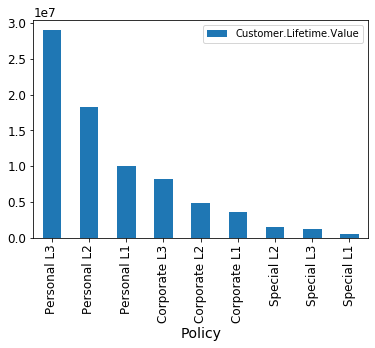

In [43]:
# Bar Chart to analyse the relationship between Policy and Customer.Lifetime.Value
x=pd.DataFrame(data.groupby('Policy')['Customer.Lifetime.Value'].sum())
x=x.sort_values(by='Customer.Lifetime.Value',ascending=False)
print(x)
x.plot(kind='bar')
# Note that Personal L3 policies have high CLV sum.
# Taking overall policy types into account, any organization will have personal policies than corporate and special policies.
# So, their sum contributes to more and their overall contribution for business/CLF is more.

In [44]:
y=pd.DataFrame(data.groupby('Vehicle.Class')['Customer.Lifetime.Value'].mean())
y=y.sort_values(by='Customer.Lifetime.Value',ascending=False)
y

,Customer.Lifetime.Value
Vehicle.Class,
Luxury SUV,17209.235946
Luxury Car,16831.827678
Sports Car,10681.357303
SUV,10476.284442
Two-Door Car,6652.805740
Four-Door Car,6638.692906


<Figure size 576x720 with 0 Axes>

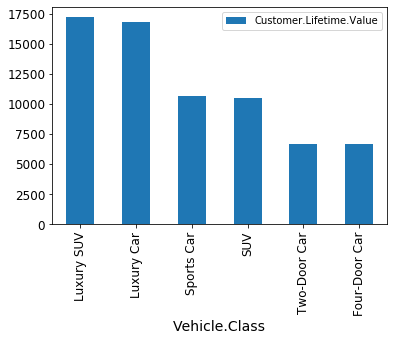

In [45]:
# Bar Chart to analyse the relationship between Vehicle.Class and Customer.Lifetime.Value 
plt.figure(figsize=(8,10))
y.plot(kind='bar')
plt.show()
# People who take policies for Luxury cars, especially Luxury SUV cars have the highest CLV.

#### Split train data into train and validation. Use train data to train the model and validation data to evaluate the model.

In [163]:
# split predictors and target
traindata_x=data.drop(['Customer.Lifetime.Value'],axis=1)
traindata_y=pd.DataFrame(data['Customer.Lifetime.Value'])
print(traindata_x.columns);print(traindata_y.columns)

Index(['CustomerID', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Location.Geo', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')
Index(['Customer.Lifetime.Value'], dtype='object')


In [164]:
# Split train and validation data
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(traindata_x,traindata_y,test_size=0.2,random_state=42)
print(train_x.shape)
print(val_x.shape)
print(train_y.shape)
print(val_y.shape)

(7844, 21)
(1962, 21)
(7844, 1)
(1962, 1)


#### Outlier Analysis

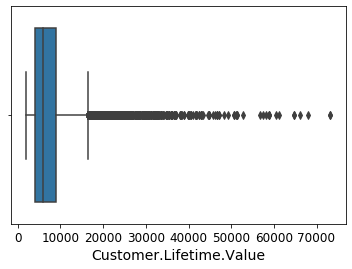

In [165]:
# Check for any outliers through boxplot for the target column
sns.boxplot("Customer.Lifetime.Value", data = train_y)
# There are few outliers

In [166]:
# Function to get Upper and Lower Quantiles for all the numerical columns of a dataset
def getUpperLowerQuantiles(data) :
    LowerQuantile=[]
    UpperQuantile=[]
    num_cols=data.select_dtypes(include=['int64','float64']).columns
    print(num_cols)
    for i in num_cols:
        LowerQuantile.append(data[i].quantile(.01))
        UpperQuantile.append(data[i].quantile(.99))
    return(LowerQuantile,UpperQuantile)

In [167]:
# Get the Upper and Lower Quantiles
LowerQuantile,UpperQuantile=list(getUpperLowerQuantiles(train_y))

Index(['Customer.Lifetime.Value'], dtype='object')


In [168]:
LowerQuantile

[2229.96116849]

In [169]:
UpperQuantile

[35947.97247409997]

In [170]:
# Function to check if there are any outliers in a dataset, by comparing them with upper and lower quantiles
def getOutliers(data) :
    for i in range(data.shape[1]):
        print("--------------")
        print(data.iloc[:,i][data.iloc[:,i]>UpperQuantile[i]])
        print(data.iloc[:,i][data.iloc[:,i]<LowerQuantile[i]])

In [171]:
# To extract Outliers (if any) from train data
getOutliers(train_y)

--------------
3100    36707.42639
2522    47155.62558
3387    43026.52149
9149    44520.13577
6860    57520.50151
           ...     
559     40636.66734
7206    42561.63183
569     41855.17315
225     38410.59556
6396    37111.65952
Name: Customer.Lifetime.Value, Length: 79, dtype: float64
4700    2222.865016
5456    2009.772923
1280    2168.523464
8321    2219.995914
8584    2163.870179
           ...     
8778    1994.774936
7083    2119.894333
9160    2167.330201
6905    2144.921535
3890    2127.923570
Name: Customer.Lifetime.Value, Length: 79, dtype: float64


In [172]:
# Function to do quantile clipping incase of any outliers
def clip_outliers(data):
    data.clip(lower=LowerQuantile, axis=1, inplace=True)
    data.clip(upper=UpperQuantile, axis=1, inplace=True)

In [173]:
# Clip Outliers (if any) in train data
clip_outliers(train_y)

In [174]:
# Verify that there are no more outliers after clipping
getOutliers(train_y)

--------------
Series([], Name: Customer.Lifetime.Value, dtype: float64)
Series([], Name: Customer.Lifetime.Value, dtype: float64)


In [175]:
# Clip Outliers (if any) in validation data 
clip_outliers(val_y)

In [176]:
# Verify that there are no more outliers after clipping
getOutliers(val_y)

--------------
Series([], Name: Customer.Lifetime.Value, dtype: float64)
Series([], Name: Customer.Lifetime.Value, dtype: float64)


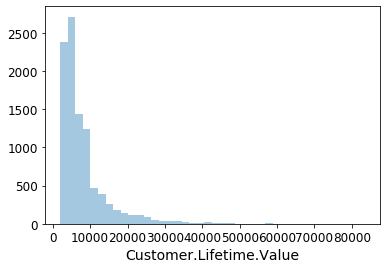

In [177]:
# Check the distribution of the variable before removing outliers
sns.distplot(data["Customer.Lifetime.Value"],kde = False, bins = 40 )

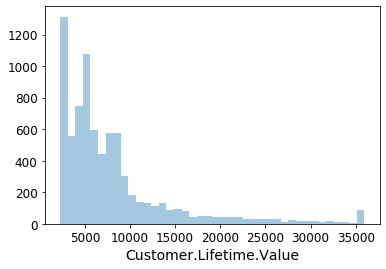

In [178]:
# Check the distribution of the variable after removing outliers
sns.distplot(train_y["Customer.Lifetime.Value"],kde = False, bins = 40 )

In [179]:
######################################## Required Functions for Data Pre-processing ############################################

In [180]:
# Function to convert all object columns to categorical
def convert_obj_categ(data) :
    categ_cols=data.select_dtypes(include='object').columns
    for i in categ_cols :
        data[categ_cols]=data[categ_cols].astype('str').astype('category')
    print (data.select_dtypes(include='category').columns, "columns are converted to categorical")

In [181]:
# Function to convert required numeric/object columns to categorical
def convert_other_categ(data,other_categ_cols) :
    for i in other_categ_cols :
        data[other_categ_cols]=data[other_categ_cols].astype('str').astype('category')
    print (data.select_dtypes(include='category').columns, "columns are converted to categorical")

In [182]:
# Function to drop constant columns
def drop_constant_cols(data) :
    const_cols=[]
    for i in data.columns :
        if data[i].nunique()<2 :
            const_cols.append(i)
    print("Deleting constant columns", const_cols)
    data.drop(const_cols,axis=1,inplace=True)

In [183]:
# Function to drop unimportant columns
def drop_unimp_cols(data,unimp_cols) :
    print("Deleting unimportant columns", unimp_cols)
    data.drop(unimp_cols,axis=1,inplace=True)

In [184]:
# Function to do one-hot encoding for a categorical variable with multiple levels
# Get whole set of dummy variables for the top most frequent levels for a categorical variable
def one_hot_top_x(data, variable, top_x_labels) :
    for label in top_x_labels :
        data[variable+'_'+label] = np.where(data[variable]==label, 1, 0)

In [185]:
# Function to get value counts of any categorical variable in train,val & test - to ensure categorical encoding is properly done
def get_value_counts(variable) :
    print(len(train_x[variable].value_counts()))
    print(len(val_x[variable].value_counts()))
    print(len(test[variable].value_counts()))
    print(train_x[variable].value_counts())
    print(val_x[variable].value_counts())
    print(test[variable].value_counts())

In [186]:
# To get numerical and non-numerical columns 
num_cols=train_x.select_dtypes(include=['int64','float64']).columns
other_cols=train_x.select_dtypes(include=['object']).columns
print(num_cols);print(other_cols)

Index(['CustomerID', 'Income', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Total.Claim.Amount',
       'Vehicle.Size'],
      dtype='object')
Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Geo',
       'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object')


In [187]:
# Since CustomerID is not a numeric column. Let us convert it to categorical.
convert_other_categ(train_x,'CustomerID')
convert_other_categ(val_x,'CustomerID')
convert_other_categ(test,'CustomerID')
# Since Location.Geo is not a numeric column, let us convert it to categorica.
convert_other_categ(train_x,'Location.Geo')
convert_other_categ(val_x,'Location.Geo')
convert_other_categ(test,'Location.Geo')
# Since Income is not object column. Let us convert it to numeric.
train_x.Income=train_x.Income.astype('str').astype('float64')
val_x.Income=val_x.Income.astype('str').astype('float64')
test.Income=test.Income.astype('str').astype('float64')

Index(['CustomerID'], dtype='object') columns are converted to categorical
Index(['CustomerID'], dtype='object') columns are converted to categorical
Index(['CustomerID'], dtype='object') columns are converted to categorical
Index(['CustomerID', 'Location.Geo'], dtype='object') columns are converted to categorical
Index(['CustomerID', 'Location.Geo'], dtype='object') columns are converted to categorical
Index(['CustomerID', 'Location.Geo'], dtype='object') columns are converted to categorical


In [188]:
# To get numerical and non-numerical columns 
print(test.select_dtypes(include=['int64','float64']).columns)
print(test.select_dtypes(include=['object']).columns)

Index(['Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount'],
      dtype='object')
Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')


In [189]:
# Note that Vehicle.Size column is stored as categorical variable in test, while it is stored as numerical in train.

In [190]:
test['Vehicle.Size'].value_counts()

Medsize    1252
Small       343
Large       172
Name: Vehicle.Size, dtype: int64

In [191]:
train_x['Vehicle.Size'].value_counts()

2.0    5422
3.0    1506
1.0     816
Name: Vehicle.Size, dtype: int64

In [192]:
# Let us convert Vehicle.Size to numerical in test data using Ordinal encoding
# Label Encoding the target column to convert it into 0s,1s 
test['Vehicle.Size'] = test['Vehicle.Size'].astype('category')
test['Vehicle.Size'] = test['Vehicle.Size'].map({'Small':1 , 'Medsize':2, 'Large':3})

In [193]:
# Vehicle size in test data is stored as object. Let us convert it to numeric.
test['Vehicle.Size']=test['Vehicle.Size'].astype('float64')

In [194]:
test['Vehicle.Size'].value_counts()

2.0    1252
1.0     343
3.0     172
Name: Vehicle.Size, dtype: int64

In [200]:
# To get numerical and non-numerical columns 
num_cols=train_x.select_dtypes(include=['int64','float64']).columns
other_cols=train_x.select_dtypes(include=['object']).columns
print(num_cols);print(other_cols)

Index(['Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size'],
      dtype='object')
Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class'],
      dtype='object')


#### Handling Null Values

In [201]:
# There are null values in train and test data. We use Simple Imputation to impute missing values. Mean imputation is used to
# impute values for NAs in numerical columns and mode imputation is used to impute values for NAs in categorical columns.
# We use train data to impute values for NAs in train,validation and test.
from sklearn.impute import SimpleImputer
num_imputer=SimpleImputer()
cat_imputer=SimpleImputer(strategy='most_frequent')
num_imputer.fit(train_x[num_cols])
cat_imputer.fit(train_x[other_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [202]:
# Impute values for NAs in numerical columns
train_x[num_cols]=num_imputer.transform(train_x[num_cols])
val_x[num_cols]=num_imputer.transform(val_x[num_cols])
test[num_cols]=num_imputer.transform(test[num_cols])

In [203]:
# Impute values for NAs in categorical columns
train_x[other_cols]=cat_imputer.transform(train_x[other_cols])
val_x[other_cols]=cat_imputer.transform(val_x[other_cols])
test[other_cols]=cat_imputer.transform(test[other_cols])

In [204]:
# Now verify that there are no more NA values in train, validation and test data.
total_NAs(train_x)
total_NAs(val_x)
total_NAs(test)

Total NAs: 0
Total NAs: 0
Total NAs: 0


In [205]:
# Backing up data - Level1
train_x_backup1=train_x.copy()
val_x_backup1=val_x.copy()
train_y_backup1=train_y.copy()
val_y_backup1=val_y.copy()
test_backup1=test.copy()

In [206]:
# Use Level1 Backup data when needed
#train_x=train_x_backup1.copy()
#val_x=val_x_backup1.copy()
#train_y=train_y_backup1.copy()
#val_y=val_y_backup1.copy()
#test=test_backup1.copy()

#### Data Pre-processing

In [207]:
################################################################################################################################

In [208]:
# Converting the objects columns to categorical

In [209]:
convert_obj_categ(train_x)

Index(['CustomerID', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location.Geo', 'Location.Code', 'Marital.Status', 'Policy.Type',
       'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object') columns are converted to categorical


In [210]:
convert_obj_categ(val_x)

Index(['CustomerID', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location.Geo', 'Location.Code', 'Marital.Status', 'Policy.Type',
       'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object') columns are converted to categorical


In [211]:
convert_obj_categ(test)

Index(['CustomerID', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location.Geo', 'Location.Code', 'Marital.Status', 'Policy.Type',
       'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object') columns are converted to categorical


In [212]:
# Dropping columns with constant values and zero variance because they are not needed for model building

In [213]:
drop_constant_cols(train_x)

Deleting constant columns []


In [214]:
drop_constant_cols(val_x)

Deleting constant columns []


In [215]:
drop_constant_cols(test)

Deleting constant columns []


In [216]:
# Checking unique levels of categorical columns to apply appropriate encoding techniques (if needed)

In [217]:
get_value_counts('EmploymentStatus')

5
5
4
Employed         4910
Unemployed       1965
Medical Leave     395
Disabled          346
Retired           228
Name: EmploymentStatus, dtype: int64
Employed         1228
Unemployed        496
Medical Leave      96
Disabled           83
Retired            59
Name: EmploymentStatus, dtype: int64
Employed         1153
Unemployed        471
Disabled           74
Medical Leave      69
Name: EmploymentStatus, dtype: int64


In [218]:
# There is no Retired category in test. How do we handle this. Let us add an other category in test.
# Before we understand that let us see if Employment status attribute is really making a difference in CLV.

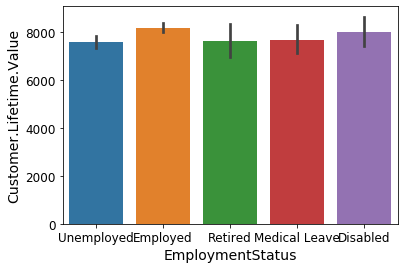

In [219]:
# Bar Chart to analyse the relationship between EmploymentStatus and Customer.Lifetime.Value
sns.barplot(y = "Customer.Lifetime.Value", x = "EmploymentStatus", data = data)

In [220]:
x=pd.DataFrame(data.groupby('EmploymentStatus')['Customer.Lifetime.Value'].mean())
x.sort_values(by='Customer.Lifetime.Value',ascending=False)

,Customer.Lifetime.Value
EmploymentStatus,
Employed,8202.301073
Disabled,8011.624415
Medical Leave,7680.464331
Retired,7632.152338
Unemployed,7612.633169


In [221]:
# We can either add a new level. We can also club Retired and Unemployed levels since retired and unemployed customers 
# are making the same value to the organization.

In [222]:
# Let us create a new level. Ordinal Encoding is done for encoding ordinal variables
empstatus_map = {'Employed':1,
               'Disabled':2,
               'Medical Leave':3,
               'Retired':4,
               'Unemployed':5,
}

train_x['EmploymentStatus_ordinal'] = train_x.EmploymentStatus.map(empstatus_map)
val_x['EmploymentStatus_ordinal'] = val_x.EmploymentStatus.map(empstatus_map)
test['EmploymentStatus_ordinal'] = test.EmploymentStatus.map(empstatus_map)

In [223]:
get_value_counts('EmploymentStatus_ordinal')

5
5
4
1    4910
5    1965
3     395
2     346
4     228
Name: EmploymentStatus_ordinal, dtype: int64
1    1228
5     496
3      96
2      83
4      59
Name: EmploymentStatus_ordinal, dtype: int64
1    1153
5     471
2      74
3      69
Name: EmploymentStatus_ordinal, dtype: int64


In [224]:
train_x.EmploymentStatus_ordinal=train_x.EmploymentStatus_ordinal.astype('str').astype('int64')
val_x.EmploymentStatus_ordinal=val_x.EmploymentStatus_ordinal.astype('str').astype('int64')
test.EmploymentStatus_ordinal=test.EmploymentStatus_ordinal.astype('str').astype('int64')

In [225]:
# Now drop the original column from train
drop_unimp_cols(train_x,'EmploymentStatus')
drop_unimp_cols(val_x,'EmploymentStatus')
drop_unimp_cols(test,'EmploymentStatus')

Deleting unimportant columns EmploymentStatus
Deleting unimportant columns EmploymentStatus
Deleting unimportant columns EmploymentStatus


In [226]:
data.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [227]:
get_value_counts('Location.Code')

3
3
3
Suburban    5050
Rural       1452
Urban       1342
Name: Location.Code, dtype: int64
Suburban    1273
Rural        358
Urban        331
Name: Location.Code, dtype: int64
Suburban    1063
Rural        399
Urban        305
Name: Location.Code, dtype: int64


In [228]:
get_value_counts('Policy.Type')

3
3
3
Personal Auto     5992
Corporate Auto    1542
Special Auto       310
Name: Policy.Type, dtype: int64
Personal Auto     1519
Corporate Auto     378
Special Auto        65
Name: Policy.Type, dtype: int64
Personal Auto     1343
Corporate Auto     354
Special Auto        70
Name: Policy.Type, dtype: int64


In [229]:
get_value_counts('Policy')

9
9
9
Personal L3     2980
Personal L2     1812
Personal L1     1024
Corporate L3     852
Corporate L2     509
Corporate L1     331
Special L2       155
Special L3       131
Special L1        50
Name: Policy, dtype: int64
Personal L3     778
Personal L2     459
Personal L1     250
Corporate L3    215
Corporate L2    109
Corporate L1     79
Special L2       34
Special L3       24
Special L1       14
Name: Policy, dtype: int64
Personal L3     669
Personal L2     407
Personal L1     254
Corporate L3    185
Corporate L2    119
Corporate L1     62
Special L3       31
Special L2       29
Special L1       11
Name: Policy, dtype: int64


In [230]:
get_value_counts('Renew.Offer.Type')

4
4
4
Offer1    3289
Offer2    2471
Offer3    1228
Offer4     856
Name: Renew.Offer.Type, dtype: int64
Offer1    814
Offer2    613
Offer3    312
Offer4    223
Name: Renew.Offer.Type, dtype: int64
Offer1    721
Offer2    581
Offer3    252
Offer4    213
Name: Renew.Offer.Type, dtype: int64


In [231]:
get_value_counts('Sales.Channel')

4
4
4
Agent          3032
Branch         2194
Call Center    1510
Web            1108
Name: Sales.Channel, dtype: int64
Agent          766
Branch         563
Call Center    352
Web            281
Name: Sales.Channel, dtype: int64
Agent          666
Branch         484
Call Center    369
Web            248
Name: Sales.Channel, dtype: int64


In [232]:
get_value_counts('Vehicle.Class')

6
6
6
Four-Door Car    4012
Two-Door Car     1608
SUV              1509
Sports Car        417
Luxury Car        150
Luxury SUV        148
Name: Vehicle.Class, dtype: int64
Four-Door Car    983
Two-Door Car     417
SUV              390
Sports Car       100
Luxury SUV        38
Luxury Car        34
Name: Vehicle.Class, dtype: int64
Four-Door Car    870
SUV              367
Two-Door Car     362
Sports Car        99
Luxury SUV        39
Luxury Car        30
Name: Vehicle.Class, dtype: int64


In [233]:
# let's make a list of the most frequent levels of a categorical variable
#top_10_ = [x for x in train_x..value_counts().sort_values(ascending=False).head(10).index]
#top_10_

In [234]:
# Now let us do one-hot encoding on those top 10 frequent categorical levels.
#one_hot_top_x(train_x, '', top_10_)
#train_x.head()

In [235]:
#one_hot_top_x(val_x, '', top_10_)

In [236]:
#one_hot_top_x(test, '', top_10_)

In [237]:
# Now drop the original column from train
#drop_unimp_cols(train_x,'')

In [238]:
# Now drop the original column from val
#drop_unimp_cols(val_x,'')

In [239]:
# Now drop the original column from test
#drop_unimp_cols(test,'')

In [240]:
################################## After all the pre-processing steps are completed ############################################

In [241]:
train_x.columns

Index(['CustomerID', 'Coverage', 'Education', 'Gender', 'Income',
       'Location.Geo', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size',
       'EmploymentStatus_ordinal'],
      dtype='object')

In [242]:
# Dropping other unwanted columns from train based on pre-processing and business understanding
drop_unimp_cols(train_x,['CustomerID', 'Education', 'Gender', 'Location.Geo', 'Marital.Status'])

Deleting unimportant columns ['CustomerID', 'Education', 'Gender', 'Location.Geo', 'Marital.Status']


In [243]:
# Dropping other unwanted columns from val based on pre-processing and business understanding
drop_unimp_cols(val_x,['CustomerID', 'Education', 'Gender', 'Location.Geo', 'Marital.Status'])

Deleting unimportant columns ['CustomerID', 'Education', 'Gender', 'Location.Geo', 'Marital.Status']


In [244]:
# Dropping other unwanted columns from test based on pre-processing and business understanding
drop_unimp_cols(test,['CustomerID', 'Education', 'Gender', 'Location.Geo', 'Marital.Status'])

Deleting unimportant columns ['CustomerID', 'Education', 'Gender', 'Location.Geo', 'Marital.Status']


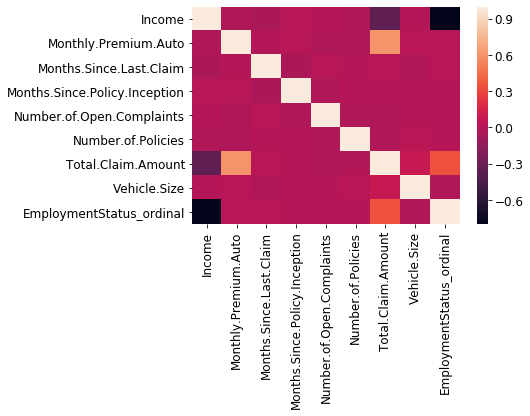

In [245]:
# Get the correlation matrix to check multicolinearity
corr = train_x.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# Looks like Employment status and Income are correlated, Total Claim Amount and Monthly Premium Amount are also correlated.

In [246]:
corr

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,EmploymentStatus_ordinal
Income,1.000000,-0.020716,-0.037868,0.012110,0.000018,-0.007408,-0.355504,0.005573,-0.798023
Monthly.Premium.Auto,-0.020716,1.000000,0.007457,0.015438,-0.018644,-0.014721,0.605891,0.016840,0.011407
Months.Since.Last.Claim,-0.037868,0.007457,1.000000,-0.039821,0.016370,0.007349,0.020821,-0.014677,0.030526
Months.Since.Policy.Inception,0.012110,0.015438,-0.039821,1.000000,-0.015816,0.000924,0.000827,0.004858,0.006575
Number.of.Open.Complaints,0.000018,-0.018644,0.016370,-0.015816,1.000000,-0.010120,-0.022838,-0.002911,-0.003336
Number.of.Policies,-0.007408,-0.014721,0.007349,0.000924,-0.010120,1.000000,-0.009372,0.028290,0.005410
Total.Claim.Amount,-0.355504,0.605891,0.020821,0.000827,-0.022838,-0.009372,1.000000,0.083572,0.352578
Vehicle.Size,0.005573,0.016840,-0.014677,0.004858,-0.002911,0.028290,0.083572,1.000000,-0.010589
EmploymentStatus_ordinal,-0.798023,0.011407,0.030526,0.006575,-0.003336,0.005410,0.352578,-0.010589,1.000000


In [247]:
# Looks like Employment status and Income are correlated, Total Claim Amount and Monthly Premium Amount are also correlated.
# We can either drop Employment status or Income; We can drop Monthly Premium Amount since Total Claim Amount will be high if 
# monthly premium amount is high. Let us verify the same.

In [248]:
train_x.columns

Index(['Coverage', 'Income', 'Location.Code', 'Monthly.Premium.Auto',
       'Months.Since.Last.Claim', 'Months.Since.Policy.Inception',
       'Number.of.Open.Complaints', 'Number.of.Policies', 'Policy.Type',
       'Policy', 'Renew.Offer.Type', 'Sales.Channel', 'Total.Claim.Amount',
       'Vehicle.Class', 'Vehicle.Size', 'EmploymentStatus_ordinal'],
      dtype='object')

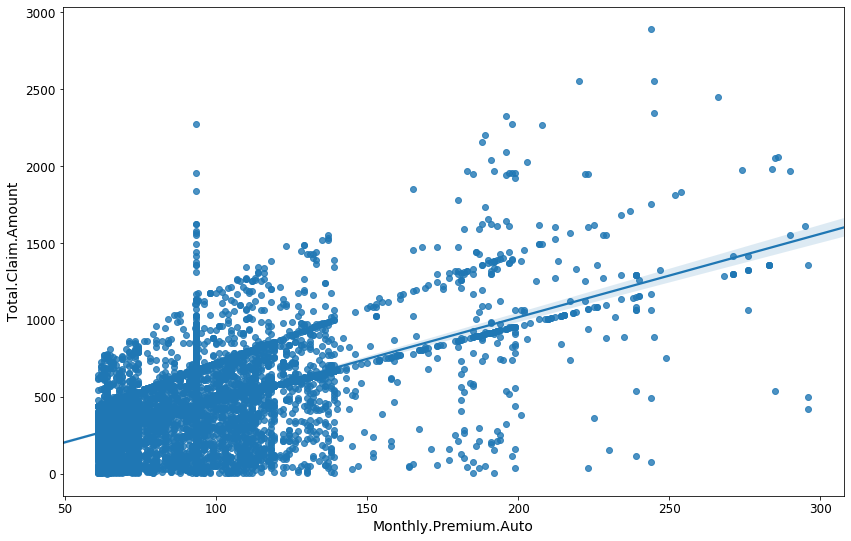

In [249]:
# Plot a scatterplot(regplot) using seaborn. A scatterplot is used to check the relation between 2 numerical variables.
# Plot between Monthly.Premium.Auto as Independent variable and Total.Claim.Amount as dependent variable.
plt.figure(figsize=(14,9))
sns.regplot(x='Monthly.Premium.Auto',y='Total.Claim.Amount',data=train_x)
plt.show()

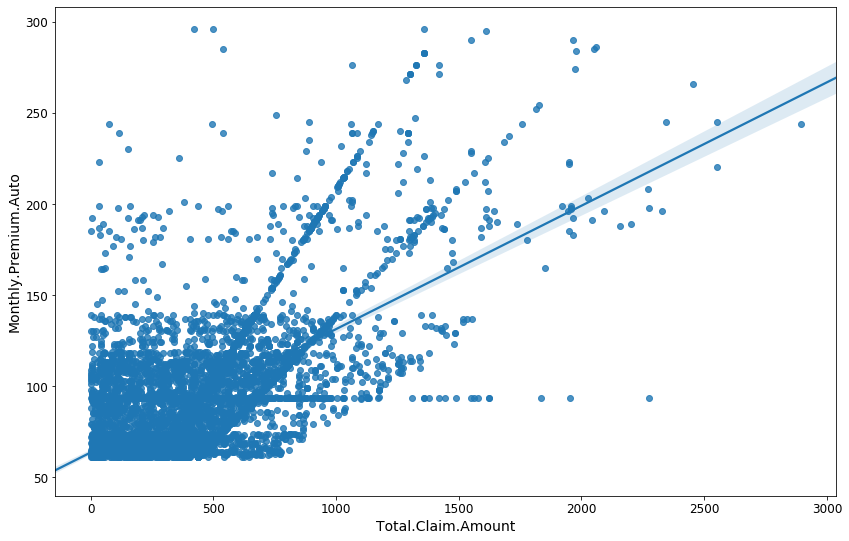

In [250]:
# Plot a scatterplot(regplot) using seaborn. A scatterplot is used to check the relation between 2 numerical variables.
# Plot between Total.Claim.Amount as Independent variable and Monthly.Premium.Auto as dependent variable.
plt.figure(figsize=(14,9))
sns.regplot(y='Monthly.Premium.Auto',x='Total.Claim.Amount',data=train_x)
plt.show()

In [251]:
# Though both of them appear to be similar. We see more of a linear relationship kind of pattern in the first scatterplot between
# Total.Claim.Amount and retain Monthly.Premium.Auto. So, let us retain Monthly.Premium.Auto and drop Total.Claim.Amount.

In [252]:
drop_unimp_cols(train_x,'Total.Claim.Amount')

Deleting unimportant columns Total.Claim.Amount


In [253]:
drop_unimp_cols(val_x,'Total.Claim.Amount')

Deleting unimportant columns Total.Claim.Amount


In [254]:
drop_unimp_cols(test,'Total.Claim.Amount')

Deleting unimportant columns Total.Claim.Amount


In [255]:
data.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [256]:
# Let us analyze how important are the columns Months.Since.Last.Claim and Months.Since.Policy.Inception in determing the CLV.

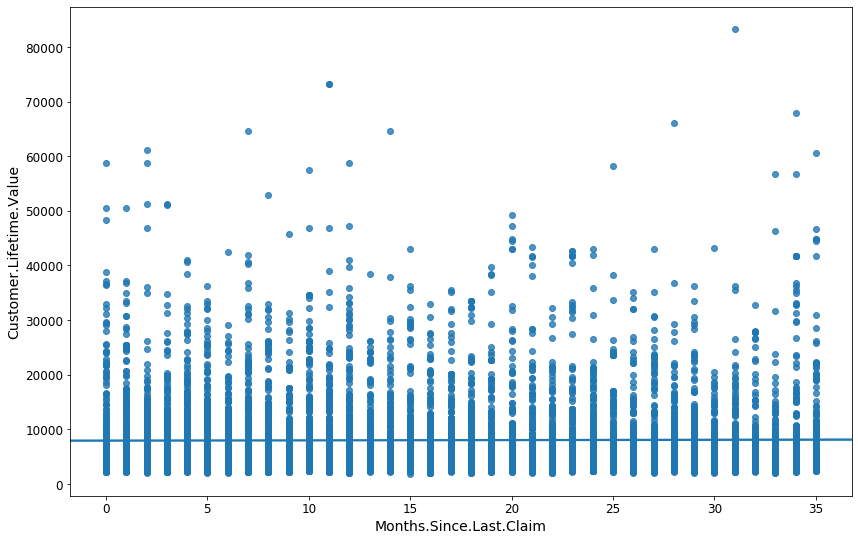

In [257]:
# Plot between Months.Since.Last.Claim as Independent variable and Customer.Lifetime.Value as dependent variable.
plt.figure(figsize=(14,9))
sns.regplot(y='Customer.Lifetime.Value',x='Months.Since.Last.Claim',data=data)
plt.show()

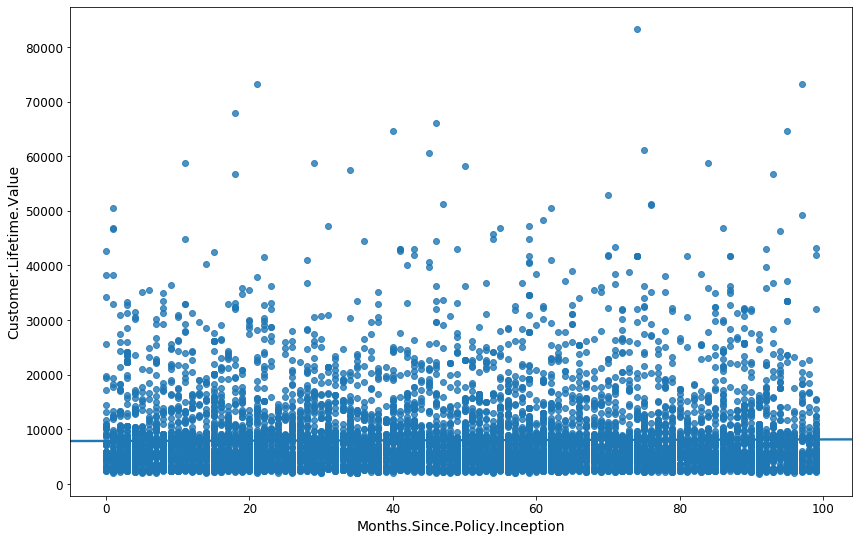

In [258]:
# Plot between Months.Since.Policy.Inception as Independent variable and Customer.Lifetime.Value as dependent variable.
plt.figure(figsize=(14,9))
sns.regplot(y='Customer.Lifetime.Value',x='Months.Since.Policy.Inception',data=data)
plt.show()

In [259]:
# Looks like these two variables doesn't have any real pattern with the target variable.
# But let us retain them for now and go ahead with model building.

In [260]:
# Concatinate predictors and target variable
traindata=pd.concat([train_x,train_y],axis=1)
traindata.head(1)

,Coverage,Income,Location.Code,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Vehicle.Size,EmploymentStatus_ordinal,Customer.Lifetime.Value
6498,Extended,54780.0,Suburban,91.0,33.0,77.0,1.0,7.0,Corporate Auto,Corporate L2,Offer1,Branch,Two-Door Car,2.0,1,7034.345804


In [261]:
# Backing up pre-processed data - Level 2
train_x_backup2=train_x.copy()
train_y_backup2=train_y.copy()
val_x_backup2=val_x.copy()
val_y_backup2=val_y.copy()
test_backup2=test.copy()
traindata_backup2=traindata.copy()

In [262]:
# Use Level2 Backup data when needed
#train_x=train_x_backup2.copy()
#train_y=train_y_backup2.copy()
#val_x=val_x_backup2.copy()
#val_y=val_y_backup2.copy()
#test=test_backup2.copy()
#traindata=traindata_backup2.copy()

In [263]:
understand_data(train_x)

,Datatype,No of NAs,No of Levels,Levels
Coverage,category,0,3,"[Extended, Basic, Premium]\nCategories (3, obj..."
Income,float64,0,3981,[54780. 0. 24825. ... 58484. 54834. 17920.]
Location.Code,category,0,3,"[Suburban, Rural, Urban]\nCategories (3, objec..."
Monthly.Premium.Auto,float64,0,184,[ 91. 79. 64. 65. ...
Months.Since.Last.Claim,float64,0,36,[33. 21. 34. 7. 9. 35. 17. 12. 0. 15. 10. ...
Months.Since.Policy.Inception,float64,0,100,[77. 53. 44. 67. 23. 38. 61. 86. 74. 24. 63. 7...
Number.of.Open.Complaints,float64,0,7,[1. 0. 4. 2. 3...
Number.of.Policies,float64,0,10,[7. 1. 6. 2. 3...
Policy.Type,category,0,3,"[Corporate Auto, Personal Auto, Special Auto]\..."
Policy,category,0,9,"[Corporate L2, Personal L3, Personal L1, Perso..."


In [264]:
understand_data(val_x)

,Datatype,No of NAs,No of Levels,Levels
Coverage,category,0,3,"[Extended, Basic, Premium]\nCategories (3, obj..."
Income,float64,0,1253,[74243. 0. 22705. ... 29460. 70446. 10269.]
Location.Code,category,0,3,"[Rural, Suburban, Urban]\nCategories (3, objec..."
Monthly.Premium.Auto,float64,0,137,[ 84. 101. 239. 80. ...
Months.Since.Last.Claim,float64,0,36,[34. 10. 19. 33. 1. 5. 26. 2. 7. 35. 23. 2...
Months.Since.Policy.Inception,float64,0,100,[ 2. 48. 59. 72. 80. 62. 56. 52. 15. 35. 70. 3...
Number.of.Open.Complaints,float64,0,7,[0. 0.37315716 3. 1. 5...
Number.of.Policies,float64,0,10,[2. 7. 1. 6. 5...
Policy.Type,category,0,3,"[Corporate Auto, Personal Auto, Special Auto]\..."
Policy,category,0,9,"[Corporate L2, Personal L3, Personal L1, Perso..."


In [265]:
understand_data(test)

,Datatype,No of NAs,No of Levels,Levels
Coverage,category,0,3,"[Basic, Extended, Premium]\nCategories (3, obj..."
Income,float64,0,1220,[43836. 28812. 77026. ... 30205. 36918. 59367.]
Location.Code,category,0,3,"[Rural, Urban, Suburban]\nCategories (3, objec..."
Monthly.Premium.Auto,float64,0,143,[ 73. 93. 110. 64. ...
Months.Since.Last.Claim,float64,0,36,[12. 17. 9. 8. 13. 22. 15. 1. 19. 7. 11. ...
Months.Since.Policy.Inception,float64,0,100,[44. 7. 82. 50. 49. 3. 1. 47. 14. 42. 10. 7...
Number.of.Open.Complaints,float64,0,6,[0. 2. 1. 3. 4. 5.]
Number.of.Policies,float64,0,9,[1. 8. 3. 2. 6. 4. 7. 9. 5.]
Policy.Type,category,0,3,"[Personal Auto, Special Auto, Corporate Auto]\..."
Policy,category,0,9,"[Personal L1, Special L2, Corporate L1, Corpor..."


In [266]:
print("======verify that the no of columns are the same in train,val and test before model building======")
print(train_x.shape[1])
print(val_x.shape[1])
print(test.shape[1])

======verify that the no of columns are the same in train,val and test before model building======
15
15
15


In [267]:
# Get final categorical columns
cat_new_cols=train_x.select_dtypes(include='category').columns
cat_new_cols

Index(['Coverage', 'Location.Code', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object')

In [268]:
# Get final numerical columns
num_new_cols=train_x.select_dtypes(include=['int64','float64']).columns
num_new_cols

Index(['Income', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Vehicle.Size', 'EmploymentStatus_ordinal'],
      dtype='object')

In [269]:
# Dummify the categorical columns
train_x=pd.get_dummies(train_x,columns=cat_new_cols,drop_first=True)
val_x=pd.get_dummies(val_x,columns=cat_new_cols,drop_first=True)
test=pd.get_dummies(test,columns=cat_new_cols,drop_first=True)

In [270]:
print("======verify that the no of columns are the same in train,val and test after dummification======")
print(train_x.shape[1])
print(val_x.shape[1])
print(test.shape[1])

======verify that the no of columns are the same in train,val and test after dummification======
33
33
33


In [271]:
# standardize the numerical columns - standardizing isn't necessary for all the machine learning models. It helps to get all the
# variables of different units and scaled to comedown to a common scale so that the model isn't biased to any of them.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x[num_new_cols])
train_x[num_new_cols] =scaler.transform(train_x[num_new_cols])
val_x[num_new_cols] =scaler.transform(val_x[num_new_cols])
test[num_new_cols] =scaler.transform(test[num_new_cols])

#### Linear Regression

In [272]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def model_building(model):
    m=model
    m.fit(train_x,train_y)
    train_pred = m.predict(train_x)
    val_pred = m.predict(val_x)
    #residuals=val_pred-val_y
    #sns.residplot(val_pred,residuals,lowess=True, color="g")
    print('=======Train======')
    print('MSE: ', mean_squared_error(train_y, train_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(train_y, train_pred)))
    print('MAE: ', mean_absolute_error(train_y,train_pred))
    print('MAPE: ', np.mean(np.abs((train_y - train_pred)/train_y))*100)
    print('======Test======')
    print('MSE: ', mean_squared_error(val_y, val_pred))
    print('RMSE: ', np.sqrt(mean_squared_error(val_y, val_pred)))
    print('MAE: ', mean_absolute_error(val_y,val_pred))
    print ('MAPE: ',np.mean(np.abs((val_y - val_pred)/val_y))*100)
    return m

In [273]:
from sklearn.linear_model import LinearRegression
reg = model_building(LinearRegression())

=======Train======
MSE:  33717253.67654746
RMSE:  5806.655980557783
MAE:  3782.512568499587
MAPE:  Customer.Lifetime.Value    58.554
dtype: float64
======Test======
MSE:  31486161.847662702
RMSE:  5611.253144143713
MAE:  3760.129867812651
MAPE:  Customer.Lifetime.Value    61.288813
dtype: float64


([3566.7376410426336,
  3743.425793560211,
  3781.9617740611257,
  3721.2954958877235,
  3781.3585904568863,
  3739.720434241715,
  3769.3290220994204,
  3755.9521591741077,
  3769.4631076482515,
  3782.512568499587],
 [3859.910020524313,
  3804.869621505207,
  3781.155393610154,
  3764.895091937926,
  3772.9282283307843,
  3763.0760435982393,
  3771.0618233912264,
  3751.5903751415585,
  3763.798283071591,
  3760.129867812651])

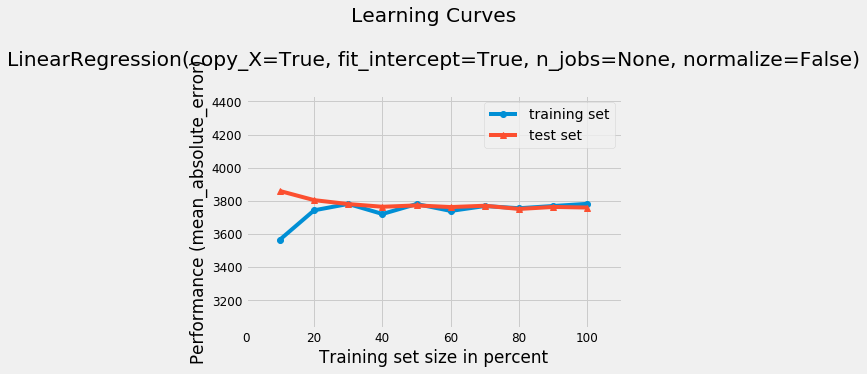

In [274]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(train_x, train_y, val_x, val_y, reg, scoring='mean_absolute_error')

                ### Train and validation error go hand in hand, but the error is high!

In [275]:
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.linear_model import Ridge
#model = ResidualsPlot(Ridge())
#model.fit(train_x, train_y)
#model.score(val_x, val_y)
#model.show()

In [276]:
########################################### Functions for model evaluation #####################################################

In [277]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [278]:
def ErrorMetrics(train_y,train_pred,val_y,val_pred):
    print("-----Train Error------")
    print("SSE:", mean_squared_error(train_y, train_pred))
    print("RMSE:", np.sqrt(mean_squared_error(train_y, train_pred)))
    print("MAE:", mean_absolute_error(train_y, train_pred))
    
    print("-----Validation Error------")
    print("SSE:", mean_squared_error(val_y, val_pred))
    print("RMSE:", np.sqrt(mean_squared_error(val_y, val_pred)))
    print("MAE:", mean_absolute_error(val_y, val_pred))

#### Decission Tree

In [279]:
# Build DT Model
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dt_reg1 = DecisionTreeRegressor(max_depth=7)

# Fit the model on train data
%time dt_reg1.fit(train_x,train_y)
print(dt_reg1.score)

# Predict target on train and val data
train_pred = dt_reg1.predict(train_x)
val_pred = dt_reg1.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

Wall time: 28.8 ms
<bound method RegressorMixin.score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>
-----Train Error------
SSE: 10833068.741348382
RMSE: 3291.3627483685814
MAE: 1568.802779683003
-----Validation Error------
SSE: 11144615.889731955
RMSE: 3338.355267153566
MAE: 1589.199266226872


([985.0435285057644,
  1320.863640397447,
  1433.4987909867841,
  1380.6410107917682,
  1487.5401512282654,
  1487.259956970004,
  1530.5167145154485,
  1535.824419772942,
  1565.4153046448,
  1568.8027796830036],
 [1844.7232714963595,
  1706.1988462484487,
  1666.3693322924553,
  1699.614778140833,
  1592.8921627012442,
  1588.61294933027,
  1576.7285467496442,
  1571.799905281895,
  1606.8181453770053,
  1588.9897887168481])

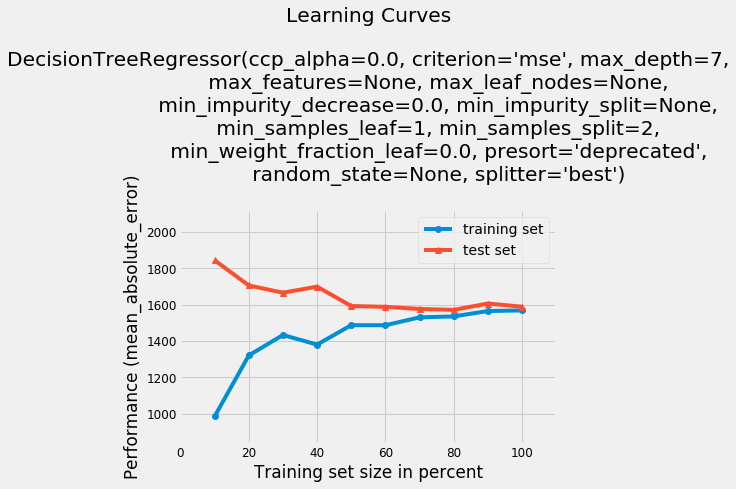

In [280]:
plot_learning_curves(train_x, train_y, val_x, val_y, dt_reg1, scoring='mean_absolute_error')

                ### Train and validation error go hand in hand, but the error is still high!

#### Decission Tree with Grid

In [281]:
# Build Model
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
dt_grid=DecisionTreeRegressor(random_state=2)
dt_param_grid = {"min_samples_leaf": [2,3,4,5,6,7],
                  "max_depth": [3,4,5,6,7,8]}
dt_reg2 = RandomizedSearchCV(dt_grid,dt_param_grid,cv=10,n_jobs=-1,n_iter=1000)

# Fit model on train data
%time dt_reg2.fit(train_x,train_y)
print(dt_reg2.best_score_,dt_reg2.best_params_)

# Predict target on train and val data
train_pred = dt_reg2.predict(train_x)
val_pred = dt_reg2.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

Wall time: 7.4 s
0.6899447941937862 {'min_samples_leaf': 3, 'max_depth': 5}
-----Train Error------
SSE: 12174336.356364487
RMSE: 3489.174165381328
MAE: 1771.4598484302232
-----Validation Error------
SSE: 10758970.037658429
RMSE: 3280.0868948334933
MAE: 1660.0596639899675


([2089.09434748254,
  1698.3523982793838,
  1884.4270118468778,
  1873.0343315858017,
  1858.3146605968418,
  1712.5004371207906,
  1752.8064619744064,
  1655.5424417252814,
  1658.6730191184092,
  1771.4598484302232],
 [2111.6296796163097,
  1730.7728162903868,
  1807.3260702302343,
  1773.5171757045612,
  1735.0646221423422,
  1621.9074450935318,
  1650.3219649967473,
  1624.3582037947976,
  1620.2988014496761,
  1660.0596639899675])

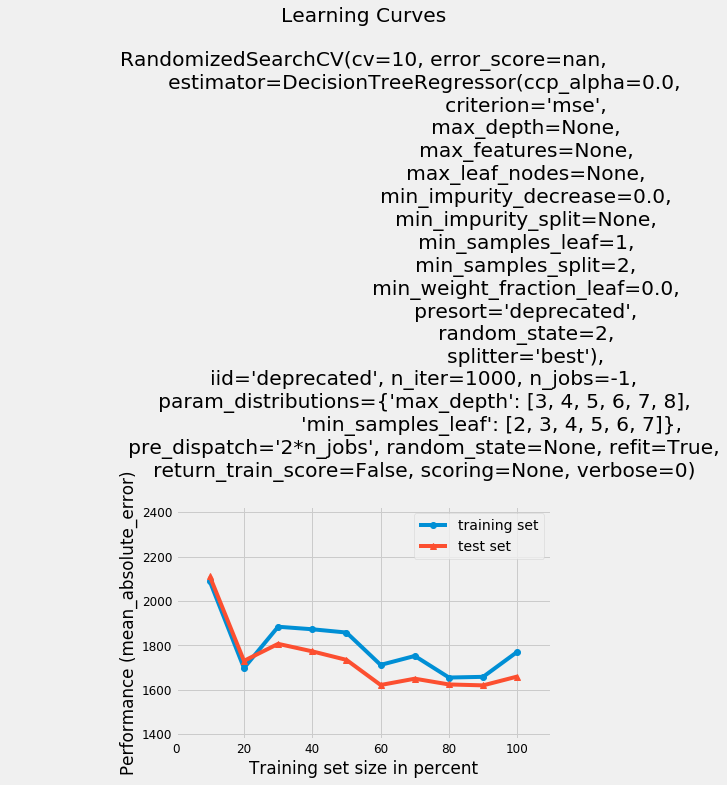

In [282]:
plot_learning_curves(train_x, train_y, val_x, val_y, dt_reg2, scoring='mean_absolute_error')

    #### Train and test error go hand in hand. Test is slightly less though. Error is still high!

#### Random Forest

In [283]:
# Build Model
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(random_state=3,max_depth=9,min_samples_leaf=3)

# Fit model on train data
%time rf1.fit(train_x,train_y)
print(rf1.score)

# Predict target on train and val data
train_pred = rf1.predict(train_x)
val_pred = rf1.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

Wall time: 3.95 s
<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)>
-----Train Error------
SSE: 8499786.892052699
RMSE: 2915.4393994821257
MAE: 1362.9344412494916
-----Validation Error------
SSE: 9869331.681977281
RMSE: 3141.549248695185
MAE: 1445.5657384781982


([950.9242450128397,
  1097.6248794054652,
  1172.9448677990906,
  1162.7203354875724,
  1242.0291479974676,
  1242.132152646262,
  1279.0591709249,
  1308.5230860368724,
  1338.5353880471614,
  1362.9344412494916],
 [1585.5038739686574,
  1512.3614172336477,
  1498.3666310260903,
  1471.958499016459,
  1462.1317014679166,
  1435.2528070920362,
  1453.1818194797172,
  1454.713327635353,
  1460.3634128233596,
  1445.5657384781982])

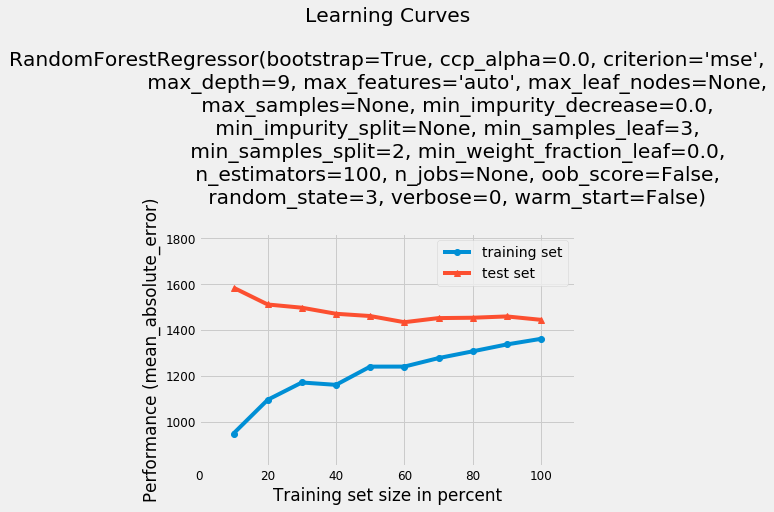

In [284]:
plot_learning_curves(train_x, train_y, val_x, val_y, rf1, scoring='mean_absolute_error')

                ### Train and validation error go hand in hand, error is lower than in other models!

#### Random Forest with Grid

In [285]:
# Build Model
rf_grid = RandomForestRegressor(random_state=4)
rf_param_grid = {"n_estimators" : [2,4,6,8,10,12,14,16,20,25],
                 "max_depth" : [5,7,9,11,13,15],
                 "min_samples_leaf" : [2,3,5,7,10]}
rf2=RandomizedSearchCV(rf_grid,rf_param_grid,cv=10,n_jobs=-1,n_iter=3000)

# Fit model on train data
%time rf2.fit(train_x,train_y)
print(rf2.best_score_,rf2.best_params_)

# Predict target on train and val data
train_pred = rf2.predict(train_x)
val_pred = rf2.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

Wall time: 5min 20s
0.7174422152027984 {'n_estimators': 25, 'min_samples_leaf': 2, 'max_depth': 15}
-----Train Error------
SSE: 3893903.64251741
RMSE: 1973.297656846886
MAE: 856.6634110202948
-----Validation Error------
SSE: 9482114.639268076
RMSE: 3079.3042459731187
MAE: 1340.6811984172361


In [288]:
plot_learning_curves(train_x, train_y, val_x, val_y, rf2, scoring='mean_absolute_error')

                ### Train and validation error go hand in hand, but the error is still high!

#### Ada Boost

In [ ]:
# Build Model
from sklearn.ensemble import AdaBoostRegressor
ada1 = AdaBoostRegressor(random_state=5,n_estimators=200,learning_rate=0.5)

# Fit model on train data
%time ada1.fit(train_x,train_y)
print(ada1.score)

# Predict target on train and val data
train_pred = ada1.predict(train_x)
val_pred = ada1.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

In [ ]:
plot_learning_curves(train_x, train_y, val_x, val_y, ada1, scoring='mean_absolute_error')

#### Ada Boost with Grid

In [ ]:
# Build Model
from sklearn.ensemble import AdaBoostRegressor
ada_grid = AdaBoostRegressor(random_state=5)
ada_param_grid = {'n_estimators':[100,200,300,400],
                  'learning_rate':[0.2,0.4,0.6]}
ada2=RandomizedSearchCV(ada_grid,ada_param_grid,cv=10,n_jobs=-1,n_iter=3000)

# Fit model on train data
%time ada2.fit(train_x,train_y)
print(ada2.best_score_,ad2.best_params_)                
        
# Predict target on train and val data
train_pred = ada2.predict(train_x)
val_pred = ada2.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

In [ ]:
plot_learning_curves(train_x, train_y, val_x, val_y, ada2, scoring='mean_absolute_error')

#### Gradient Boosting

In [ ]:
# Build Model
from sklearn.ensemble import GradientBoostingRegressor
gb1 = GradientBoostingRegressor(n_estimators=200,learning_rate=0.2,max_depth=6,max_leaf_nodes=15)

# Fit model on train data
%time gb1.fit(train_x,train_y)
print(gb1.score)

# Predict target on train and val data
train_pred = gb1.predict(train_x)
val_pred = gb1.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

In [ ]:
plot_learning_curves(train_x, train_y, val_x, val_y, gb1, scoring='mean_absolute_error')

#### Gradient Boosting with Grid

In [ ]:
# Build Model
from sklearn.ensemble import GradientBoostingRegressor
gb_grid = GradientBoostingRegressor(random_state=6)
gb_param_grid = {"n_estimators" : [100,150,200],
                  "max_depth" : [2,3,5,7],
                  "learning_rate" : [0.3,0.5]}
gb2=RandomizedSearchCV(gb_grid,gb_param_grid,cv=10,n_jobs=-1,n_iter=3000)

# Fit model on train data
%time gb2.fit(train_x,train_y)
print(gb2.best_score_,gb2.best_params_)

# Predict target on train and val data
train_pred = gb2.predict(train_x)
val_pred = gb2.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

In [ ]:
plot_learning_curves(train_x, train_y, val_x, val_y, gb2, scoring='mean_absolute_error')

#### XG Boost

In [ ]:
# Build Model
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor(random_state=6,n_estimators=200,max_depth=4,learning_rate=0.2)

# Fit model on train data
%time xgb1.fit(train_x,train_y)
print(xgb1.score)

# Predict target on train and val data
train_pred = xgb1.predict(train_x)
val_pred = xgb1.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

In [ ]:
plot_learning_curves(train_x, train_y, val_x, val_y, xgb1, scoring='mean_absolute_error')

         #### Though errors in train and validation are less, there is a significant difference between both.

                                 #### So, its an overfit model.

#### SVM

In [ ]:
from sklearn.svm import SVR
svr = SVR(C=1,kernel='rbf')

# Fit model on train data
%time svr.fit(train_x,train_y)
print(svr.score)

# Predict target on train and val data
train_pred = svr.predict(train_x)
val_pred = svr.predict(val_x)

# Evaluate the model on train and val
ErrorMetrics(train_y,train_pred,val_y,val_pred)

In [ ]:
plot_learning_curves(train_x, train_y, val_x, val_y, svr, scoring='mean_absolute_error')

#### Using best model (for the given data) predictions are generated on test data

In [ ]:
print(dt_reg1.score)
print(dt_reg2.best_score_,dt_reg2.best_params_)

print(rf1.score)
print(rf2.best_score_,rf2.best_params_)

print(ada1.score)

print(gb1.score)
print(gb2.best_score_,gb2.best_params_)

print(xgb1.score)
print(svr.score)

# RF1 is the best amongst all the models for this data.

#### Generating and Uploading test predictions

In [ ]:
Target = pd.DataFrame(rf1.predict(test),columns=['Customer.Lifetime.Value'])

In [ ]:
CustomerID=pd.DataFrame(test_backup1.CustomerID)

In [ ]:
pred=pd.concat([CustomerID,Target],axis=1)

In [ ]:
pred

In [ ]:
test.shape

In [ ]:
pred.to_csv('My_Submission.csv' , index=False)

In [ ]:
# Backing up pre-processed data - Level 3
train_x_backup3=train_x.copy()
train_y_backup3=train_y.copy()
val_x_backup3=val_x.copy()
val_y_backup3=val_y.copy()
test_backup3=test.copy()
traindata_backup3=traindata.copy()

In [ ]:
# Use Level3 Backup data when needed
#train_x=train_x_backup3.copy()
#train_y=train_y_backup3.copy()
#val_x=val_x_backup3.copy()
#val_y=val_y_backup3.copy()
#test=test_backup3.copy()
#traindata=traindata_backup3.copy()

##### Clustering

In [ ]:
knn_train_x=train_x
knn_train_y=train_y
knn_val_x=val_x
knn_val_y=val_y
knn_test=test

In [ ]:
knn_train_x.iloc[0:5,:]

In [ ]:
knn_train_x.index

In [ ]:
knn_train_x.shape

#### Fitting kmeans(k=2) algorithm on train data and getting the cluster labels for train data.

In [ ]:
from sklearn.cluster import KMeans
# Let us try taking 2 clusters
kmeans1 = KMeans(n_clusters=2,random_state=148461)
# Fitting the input data
kmeans1 = kmeans1.fit(knn_train_x)
# Getting the cluster labels
labels1 = kmeans1.predict(knn_train_x)
# Centroid values
centroids1 = kmeans1.cluster_centers_

In [ ]:
# K-means algorithm doesn't need to pick centroids as actual data points. (unlike kmedoids)
centroids1

In [ ]:
# We have a total of 7844 datapoints with 33 columns in train data.
# In cluster environment each data point is represented as a vector of its attributes.
# To calculate distance between any 2 data points (using euclidean distance), squareroot of total sum of the distances between
# their respective attributes is calculated.

In [ ]:
len(labels1[labels1==0])

In [ ]:
len(labels1[labels1==1])

In [ ]:
# Notice that out of the total 7844 datapoints, 5194 datapoints got assigned to cluster1 and 2650 datapoints got assigned to 
# cluster2 based on which ever cluster has less euclidean distance to the datapoint.

#### Fitting kmeans(k=3) algorithm on train data and getting the cluster labels for train data.

In [ ]:
# Now, let us try taking 3 clusters
kmeans2 = KMeans(n_clusters=3,random_state=148462)
# Fitting the input data
kmeans2 = kmeans2.fit(train_x)
# Getting the cluster labels
labels2 = kmeans2.predict(train_x)
# Centroid values
centroids2 = kmeans2.cluster_centers_

In [ ]:
# K-means algorithm doesn't need to pick centroids as actual data points. (unlike kmedoids)
centroids2

In [ ]:
len(labels2[labels2==0])

In [ ]:
len(labels2[labels2==1])

In [ ]:
len(labels2[labels2==2])

In [ ]:
# Note that all the data points got assigned to three clusters now (earlier they got assigned to 2 clusters)

In [ ]:
# Notice that out of the total 7844 datapoints, 4746 datapoints got assigned to cluster1, 2513 datapoints got assigned to 
# cluster2, 585 datapoints got assigned to cluster3 based on which ever cluster has less euclidean distance to the datapoint.

#### Predicting cluster labels on Test data using kmeans algorithm (taking k value as 3)

In [ ]:
# Let us now predict the cluster labels for test data.
labels_test = kmeans2.predict(test)

In [ ]:
labels_test

In [ ]:
len(labels_test[labels_test==0])

In [ ]:
len(labels_test[labels_test==1])

In [ ]:
len(labels_test[labels_test==2])

In [ ]:
test.shape

In [ ]:
# Notice that out of the total 1767 datapoints, 1083 datapoints got assigned to cluster1, 507 datapoints got assigned to 
# cluster2 and 177 datapoints got assigned to cluster3 based on which ever cluster has less euclidean distance to the datapoint.

            #########################         
            Percentage of Data Points         Cluster-1 Cluster-2 Cluster-3
            Train                              61%       29%       10%
            Test                               60%       32%       7%

In [ ]:
# Calculate inertia. (sum of squares for distance between each point with in a custer and their corresponding cluster centroid.
print(kmeans2.inertia_)

#### Determine accurate k value using Elbow curve

In [ ]:
wss= {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(train_x)
    #clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center

In [ ]:
wss

In [ ]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.title("Choosing optimal k")
plt.show()

                ####      K=3 at the elbow point would be good k value to try!

#### Cluster stability check using taking 90 percent data of original data

In [ ]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [ ]:
train_x.shape

In [ ]:
# 90 percent sample data from original train data is taken
indices=train_x.sample(frac=0.9,random_state=123).index
train_x_subset=train_x.sample(frac=0.9,random_state=123)
print(indices)

In [ ]:
train_x_subset.shape

In [ ]:
# k-means on original train data
kmeans3 = KMeans(n_clusters=3,random_state=456)
kmeans3 = kmeans3.fit(train_x)
print(len(kmeans3.labels_))
train_x['clus']=kmeans3.labels_

In [ ]:
# Now apply k-means on subset of train data
kmeans4 = KMeans(n_clusters=3,random_state=457)
kmeans4=kmeans4.fit(train_x_subset)
print(len(kmeans4.labels_))
train_x_subset['clus']=kmeans4.labels_

In [ ]:
g1=train_x.loc[indices,'clus']
g2=train_x_subset.clus

In [ ]:
adjusted_rand_score(g1,g2)

In [ ]:
# Adjusted rand score ranges between 0 and 1. So, a very high high Adjusted Rand Index is an indication of similarity 
# of datapoints presents in the clusters i.e., how similar the instances that are present in the cluster. 
# So, this measure should be high as possible else we can assume that the datapoints are randomly assigned in the clusters.

In [ ]:
# Looking at this (unsupervised analysis) knn algorithm might give better results for this kind of clustered data.

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(train_x.iloc[:, 0], train_x.iloc[:, 1], s=50);

In [ ]:
# Data looks clusterted into 3 partitions

In [ ]:
from sklearn.model_selection import GridSearchCV

def model_building(model, params = None, k = 1) :
    
    if params == None :
        model.fit(train_x, val_x)
        
        # return fitted model & train-test predictions
        return (model, model.predict(train_x), model.predict(val_x))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(train_x, train_y)
        model = model_cv.best_estimator_
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(train_x), model.predict(val_x))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(algorithm='brute', n_neighbors=4, metric = "euclidean")
knn.fit(knn_train_x, knn_train_y)

In [ ]:
predictions = knn.predict(knn_test)